# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-nu.new.339.359.362.366.367.fix.360.373.solving.357'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Tanzania', 'Fiji'],
 4: ['Saint Vincent and the Grenadines', 'Dominica', 'Grenada', 'Brunei',
     'Saint Lucia'],
 5: ['Equatorial Guinea'],
 6: ['Mauritius', 'Antigua and Barbuda', 'Cambodia'],
 7: ['Seychelles', 'Northern Mariana Islands'],
 8: ['Suriname', 'Lesotho', 'Gambia', 'Bahamas', 'Madagascar', 'Malawi',
     'Monaco', 'Trinidad and Tobago', 'Virgin Islands, U.S.', 'Vietnam',
     'Republic of the Congo', 'Kyrgyzstan', 'Liechtenstein'],
 9: ['Venezuela', 'Uzbekistan', 'Guyana', 'Zambia', 'Zimbabwe', 'Benin',
     'Swaziland', 'Oman', 'Kazakhstan', 'Belize', 'Djibouti', 'Australia',
     'Namibia', 'Bhutan', 'Rwanda', 'Burundi', 'Ghana', 'Sao Tome and Principe',
     'Senegal', 'Barbados', 'South Africa', 'Eritrea', 'Bolivia'],
 10: ['Kuwait', 'Myanmar', 'Colombia', 'Syria', 'Central African Republic',
      'Brazil', 'Kenya', 'Bahrain', 'Bermuda', 'Chile', 'Taiwan', 'Ethiopia',
      'Libya', 'Peru', 'Papua New Guinea', 'Israel', 'Puerto Rico', 'Mexic

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

3

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Canada', 'France', 'United Kingdom']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
Canada         0th    Past  02Mar2020  05Apr2020    37057765
               1st    Past  06Apr2020  18Apr2020    37057765
               2nd    Past  19Apr2020  01May2020    37057765
               3rd    Past  02May2020  18May2020    37057765
               4th    Past  19May2020  08Jun2020    37057765
               5th    Past  09Jun2020  22Jul2020    37057765
               6th    Past  23Jul2020  31Aug2020    37057765
               7th    Past  01Sep2020  23Sep2020    37057765
               8th    Past  24Sep2020  06Oct2020    37057765
               9th    Past  07Oct2020  17Oct2020    37057765
               10th   Past  18Oct2020  28Oct2020    37057765
               11th   Past  29Oct2020  06Nov2020    37057765
               12th   Past  07Nov2020  14Nov2020    37057765
               13th   Past  15Nov2020  21Nov2020    37057765
               14th   Past  22Nov2020  28Nov2020    37057765
               15th   Past  29Nov2020  05Dec2020    37057765
France         0th    Past  20Feb2020  01Apr2020    66977107
               1st    Past  02Apr2020  22Apr2020    66977107
               2nd    Past  23Apr2020  09Jul2020    66977107
               3rd    Past  10Jul2020  18Aug2020    66977107
               4th    Past  19Aug2020  02Sep2020    66977107
               5th    Past  03Sep2020  14Sep2020    66977107
               6th    Past  15Sep2020  22Sep2020    66977107
               7th    Past  23Sep2020  01Oct2020    66977107
               8th    Past  02Oct2020  08Oct2020    66977107
               9th    Past  09Oct2020  15Oct2020    66977107
               10th   Past  16Oct2020  21Oct2020    66977107
               11th   Past  22Oct2020  31Oct2020    66977107
               12th   Past  01Nov2020  10Nov2020    66977107
               13th   Past  11Nov2020  16Nov2020    66977107
               14th   Past  17Nov2020  24Nov2020    66977107
               15th   Past  25Nov2020  05Dec2020    66977107
United Kingdom 0th    Past  27Feb2020  01Apr2020    66460344
               1st    Past  02Apr2020  17Apr2020    66460344
               2nd    Past  18Apr2020  03May2020    66460344
               3rd    Past  04May2020  27May2020    66460344
               4th    Past  28May2020  27Jul2020    66460344
               5th    Past  28Jul2020  06Sep2020    66460344
               6th    Past  07Sep2020  23Sep2020    66460344
               7th    Past  24Sep2020  04Oct2020    66460344
               8th    Past  05Oct2020  12Oct2020    66460344
               9th    Past  13Oct2020  19Oct2020    66460344
               10th   Past  20Oct2020  25Oct2020    66460344
               11th   Past  26Oct2020  05Nov2020    66460344
               12th   Past  06Nov2020  11Nov2020    66460344
               13th   Past  12Nov2020  17Nov2020    66460344
               14th   Past  18Nov2020  25Nov2020    66460344
               15th   Past  26Nov2020  05Dec2020    66460344

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN,  5th phase (09Jun2020 - 22Jul2020): finished  221 trials in 0 min 10 sec

	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  236 trials in 0 min 10 sec

	GBR, 15th phase (26Nov2020 - 05Dec2020): finished  232 trials in 0 min 10 sec

	GBR,  8th phase (05Oct2020 - 12Oct2020): finished  234 trials in 0 min 10 sec

	CAN,  6th phase (23Jul2020 - 31Aug2020): finished  225 trials in 0 min 10 sec

	CAN, 14th phase (22Nov2020 - 28Nov2020): finished  236 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 05Apr2020): finished  226 trials in 0 min 10 sec

	GBR,  6th phase (07Sep2020 - 23Sep2020): finished  231 trials in 0 min 10 sec

	CAN, 13th phase (15Nov2020 - 21Nov2020): finished  235 trials in 0 min 10 sec

	GBR,  3rd phase (04May2020 - 27May2020): finished  229 trials in 0 min 10 sec

	CAN, 11th phase (29Oct2020 - 06Nov2020): finished  232 trials in 0 min 10 sec

	CAN, 15th phase (29Nov2020 - 05Dec2020): finished  235 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  4th phase (28May2020 - 27Jul2020): finished  213 trials in 0 min 10 sec

	GBR,  9th phase (13Oct2020 - 19Oct2020): finished  232 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  228 trials in 0 min 10 sec

	CAN,  4th phase (19May2020 - 08Jun2020): finished  220 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  212 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  0th phase (20Feb2020 - 01Apr2020): finished  213 trials in 0 min 10 sec

	GBR,  0th phase (27Feb2020 - 01Apr2020): finished  216 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  1st phase (02Apr2020 - 22Apr2020): finished  222 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  234 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  233 trials in 0 min 10 sec

	GBR, 14th phase (18Nov2020 - 25Nov2020): finished  233 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN,  7th phase (01Sep2020 - 23Sep2020): finished  226 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  229 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  234 trials in 0 min 10 sec

	CAN,  8th phase (24Sep2020 - 06Oct2020): finished  232 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN, 12th phase (07Nov2020 - 14Nov2020): finished  234 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  233 trials in 0 min 10 sec

	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  231 trials in 0 min 10 sec

	CAN,  2nd phase (19Apr2020 - 01May2020): finished  232 trials in 0 min 10 sec

	GBR,  5th phase (28Jul2020 - 06Sep2020): finished  224 trials in 0 min 10 sec

	CAN, 10th phase (18Oct2020 - 28Oct2020): finished  232 trials in 0 min 10 sec

	CAN,  9th phase (07Oct2020 - 17Oct2020): finished  231 trials in 0 min 10 sec

	CAN,  1st phase (06Apr2020 - 18Apr2020): finished  230 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 13th phase (12Nov2020 - 17Nov2020): finished  234 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 16Nov2020): finished  234 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 12th phase (06Nov2020 - 11Nov2020): finished  236 trials in 0 min 10 sec

	GBR,  1st phase (02Apr2020 - 17Apr2020): finished  231 trials in 0 min 10 sec

	GBR,  2nd phase (18Apr2020 - 03May2020): finished  232 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  2nd phase (23Apr2020 - 09Jul2020): finished  213 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 11th phase (26Oct2020 - 05Nov2020): finished  234 trials in 0 min 10 sec

	FRA, 15th phase (25Nov2020 - 05Dec2020): finished  232 trials in 0 min 10 sec

	GBR,  7th phase (24Sep2020 - 04Oct2020): finished  234 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  3rd phase (10Jul2020 - 18Aug2020): finished  225 trials in 0 min 10 sec

	CAN,  3rd phase (02May2020 - 18May2020): finished  234 trials in 0 min 10 sec

	GBR, 10th phase (20Oct2020 - 25Oct2020): finished  241 trials in 0 min 10 sec

	FRA, 14th phase (17Nov2020 - 24Nov2020): finished  242 trials in 0 min 10 sec

Completed optimization. Total: 2 min 16 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE      Rt  \
Country        Phase                                                          
Canada         0th    Past  02Mar2020  05Apr2020    37057765  SIR-F   31.82   
               1st    Past  06Apr2020  18Apr2020    37057765  SIR-F    2.29   
               2nd    Past  19Apr2020  01May2020    37057765  SIR-F    1.68   
               3rd    Past  02May2020  18May2020    37057765  SIR-F    1.26   
               4th    Past  19May2020  08Jun2020    37057765  SIR-F    0.86   
               5th    Past  09Jun2020  22Jul2020    37057765  SIR-F    0.57   
               6th    Past  23Jul2020  31Aug2020    37057765  SIR-F    1.00   
               7th    Past  01Sep2020  23Sep2020    37057765  SIR-F    1.39   
               8th    Past  24Sep2020  06Oct2020    37057765  SIR-F    1.48   
               9th    Past  07Oct2020  17Oct2020    37057765  SIR-F    1.23   
               10th   Past  18Oct2020  28Oct2020    37057765  SIR-F    1.16   
               11th   Past  29Oct2020  06Nov2020    37057765  SIR-F    1.52   
               12th   Past  07Nov2020  14Nov2020    37057765  SIR-F    1.62   
               13th   Past  15Nov2020  21Nov2020    37057765  SIR-F    1.15   
               14th   Past  22Nov2020  28Nov2020    37057765  SIR-F    1.31   
               15th   Past  29Nov2020  05Dec2020    37057765  SIR-F    1.62   
France         0th    Past  20Feb2020  01Apr2020    66977107  SIR-F  266.04   
               1st    Past  02Apr2020  22Apr2020    66977107  SIR-F    7.94   
               2nd    Past  23Apr2020  09Jul2020    66977107  SIR-F    0.35   
               3rd    Past  10Jul2020  18Aug2020    66977107  SIR-F    1.99   
               4th    Past  19Aug2020  02Sep2020    66977107  SIR-F    4.60   
               5th    Past  03Sep2020  14Sep2020    66977107  SIR-F    3.39   
               6th    Past  15Sep2020  22Sep2020    66977107  SIR-F    2.79   
               7th    Past  23Sep2020  01Oct2020    66977107  SIR-F    2.09   
               8th    Past  02Oct2020  08Oct2020    66977107  SIR-F    1.96   
               9th    Past  09Oct2020  15Oct2020    66977107  SIR-F    2.35   
               10th   Past  16Oct2020  21Oct2020    66977107  SIR-F    2.31   
               11th   Past  22Oct2020  31Oct2020    66977107  SIR-F    3.32   
               12th   Past  01Nov2020  10Nov2020    66977107  SIR-F    2.72   
               13th   Past  11Nov2020  16Nov2020    66977107  SIR-F    0.95   
               14th   Past  17Nov2020  24Nov2020    66977107  SIR-F    0.36   
               15th   Past  25Nov2020  05Dec2020    66977107  SIR-F    0.21   
United Kingdom 0th    Past  27Feb2020  01Apr2020    66460344  SIR-F   22.66   
               1st    Past  02Apr2020  17Apr2020    66460344  SIR-F    7.45   
               2nd    Past  18Apr2020  03May2020    66460344  SIR-F    2.92   
               3rd    Past  04May2020  27May2020    66460344  SIR-F    0.65   
               4th    Past  28May2020  27Jul2020    66460344  SIR-F    0.44   
               5th    Past  28Jul2020  06Sep2020    66460344  SIR-F    1.53   
               6th    Past  07Sep2020  23Sep2020    66460344  SIR-F    3.11   
               7th    Past  24Sep2020  04Oct2020    66460344  SIR-F    3.59   
               8th    Past  05Oct2020  12Oct2020    66460344  SIR-F    4.88   
               9th    Past  13Oct2020  19Oct2020    66460344  SIR-F    4.31   
               10th   Past  20Oct2020  25Oct2020    66460344  SIR-F    3.80   
               11th   Past  26Oct2020  05Nov2020    66460344  SIR-F    1.84   
               12th   Past  06Nov2020  11Nov2020    66460344  SIR-F    1.29   
               13th   Past  12Nov2020  17Nov2020    66460344  SIR-F    1.34   
               14th   Past  18Nov2020  25Nov2020    66460344  SIR-F    0.83   
               15th   Past  26Nov2020  05Dec2020    66460344  SIR-F    0.65   

                         theta     kappa       rho     sigma  tau  \
Co

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-02,Canada,0.020042,0.000568,0.041773,0.000718,0.02,439,5,348,...,0,0,0,0,0,1,0,1,1,2.78
1,2020-03-02,Canada,0.020042,0.000568,0.041773,0.000718,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-03-02,Canada,0.020042,0.000568,0.041773,0.000718,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-03-02,Canada,0.020042,0.000568,0.041773,0.000718,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-03-02,Canada,0.020042,0.000568,0.041773,0.000718,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

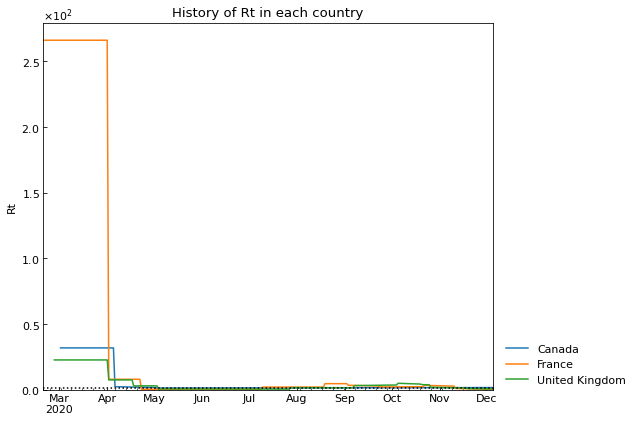

Country,Canada,France,United Kingdom
Date,,,
2020-12-01,1.62,0.21,0.65
2020-12-02,1.62,0.21,0.65
2020-12-03,1.62,0.21,0.65
2020-12-04,1.62,0.21,0.65
2020-12-05,1.62,0.21,0.65


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

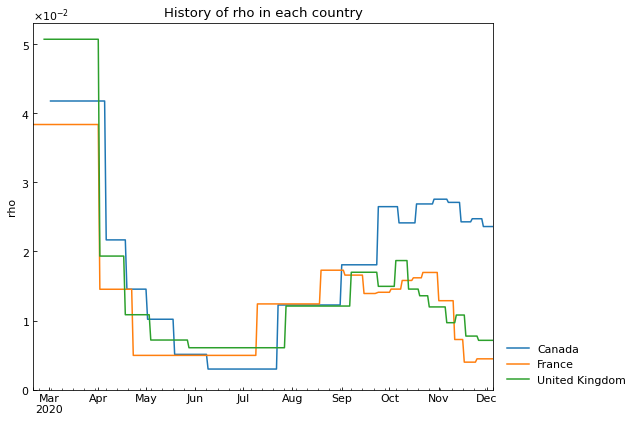

Country,Canada,France,United Kingdom
Date,,,
2020-12-01,0.023608,0.004466,0.007143
2020-12-02,0.023608,0.004466,0.007143
2020-12-03,0.023608,0.004466,0.007143
2020-12-04,0.023608,0.004466,0.007143
2020-12-05,0.023608,0.004466,0.007143


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

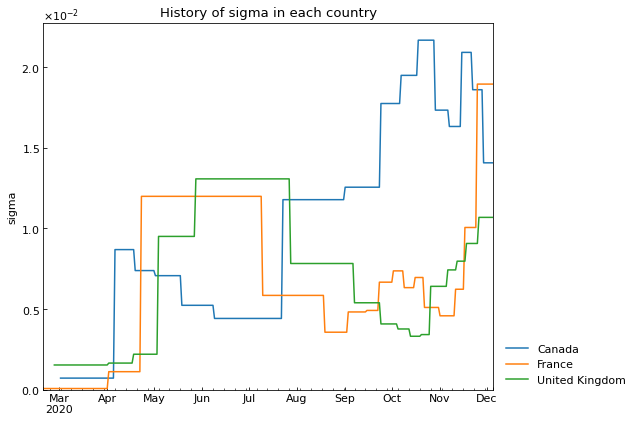

Country,Canada,France,United Kingdom
Date,,,
2020-12-01,0.01406,0.01894,0.01068
2020-12-02,0.01406,0.01894,0.01068
2020-12-03,0.01406,0.01894,0.01068
2020-12-04,0.01406,0.01894,0.01068
2020-12-05,0.01406,0.01894,0.01068


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

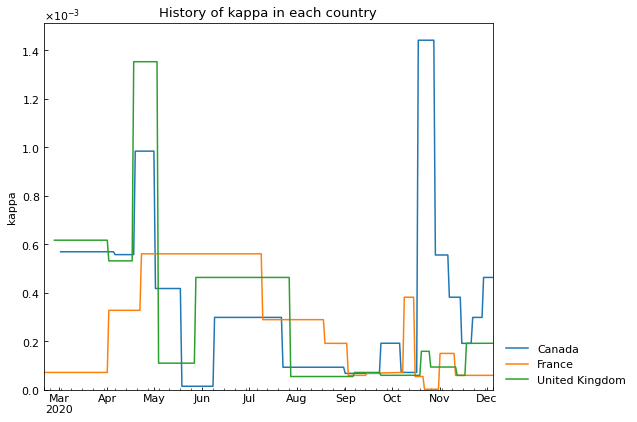

Country,Canada,France,United Kingdom
Date,,,
2020-12-01,0.000463,0.000059,0.000191
2020-12-02,0.000463,0.000059,0.000191
2020-12-03,0.000463,0.000059,0.000191
2020-12-04,0.000463,0.000059,0.000191
2020-12-05,0.000463,0.000059,0.000191


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

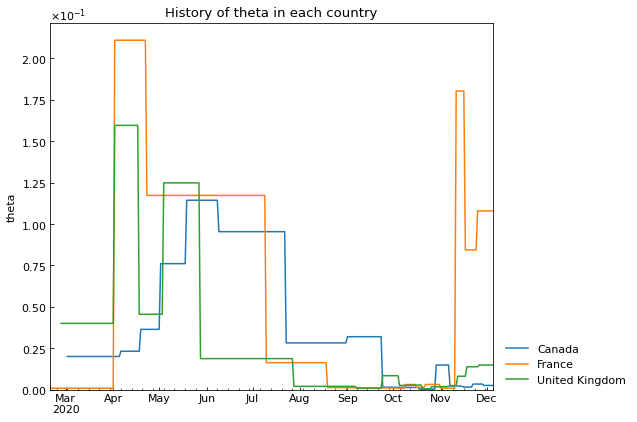

Country,Canada,France,United Kingdom
Date,,,
2020-12-01,0.002565,0.10785,0.014891
2020-12-02,0.002565,0.10785,0.014891
2020-12-03,0.002565,0.10785,0.014891
2020-12-04,0.002565,0.10785,0.014891
2020-12-05,0.002565,0.10785,0.014891


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14227 entries, 0 to 14254
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 14227 non-null  datetime64[ns]
 1   Country                              14227 non-null  object        
 2   Rt                                   14227 non-null  float64       
 3   theta                                14227 non-null  float64       
 4   kappa                                14227 non-null  float64       
 5   rho                                  14227 non-null  float64       
 6   sigma                                14227 non-null  float64       
 7   School_closing                       14227 non-null  int64         
 8   Workplace_closing                    14227 non-null  int64         
 9   Cancel_events                        14227 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.237966,-0.216401,0.595622,-0.447896,-0.284289,-0.306068,-0.034048,-0.533428,-0.182742,-0.246671,-0.186289,-0.395193,-0.514430,-0.397623,-0.354606,-0.340458
theta,-0.237966,1.000000,0.225039,-0.432656,0.031291,0.312116,0.427711,0.258178,0.199376,0.167556,0.407295,0.184007,0.124676,0.142605,-0.228916,-0.196309,0.422281
kappa,-0.216401,0.225039,1.000000,0.017398,0.170757,0.176224,0.095017,-0.021201,-0.025597,-0.060187,0.044504,-0.056774,-0.071409,0.074463,-0.133519,-0.103667,0.094886
rho,0.595622,-0.432656,0.017398,1.000000,-0.408197,-0.330162,-0.448198,-0.341869,-0.665562,-0.399665,-0.374885,-0.407728,-0.434686,-0.377426,-0.222896,-0.264839,-0.498392
sigma,-0.447896,0.031291,0.170757,-0.408197,1.000000,0.353389,0.200917,-0.030727,0.280104,-0.057843,0.089162,-0.042663,0.276991,0.270308,0.341916,0.512130,0.226772
School_closing,-0.284289,0.312116,0.176224,-0.330162,0.353389,1.000000,0.771546,0.037792,0.402200,-0.064212,0.586384,-0.028278,0.371150,0.390563,0.049856,-0.051493,0.768430
Workplace_closing,-0.306068,0.427711,0.095017,-0.448198,0.200917,0.771546,1.000000,0.343758,0.533677,0.224747,0.769689,0.242187,0.320538,0.407638,-0.105618,-0.210913,0.871773
Cancel_events,-0.034048,0.258178,-0.021201,-0.341869,-0.030727,0.037792,0.343758,1.000000,0.553301,0.818950,0.516981,0.860578,-0.206505,0.270081,-0.437200,-0.052700,0.492502
Gatherings_restrictions,-0.533428,0.199376,-0.025597,-0.665562,0.280104,0.402200,0.533677,0.553301,1.000000,0.668220,0.658988,0.708788,0.453151,0.601415,0.183683,0.321842,0.694886
Transport_closing,-0.182742,0.167556,-0.060187,-0.399665,-0.057843,-0.064212,0.224747,0.818950,0.668220,1.000000,0.534308,0.927252,-0.097997,0.261668,-0.327389,0.090618,0.377613


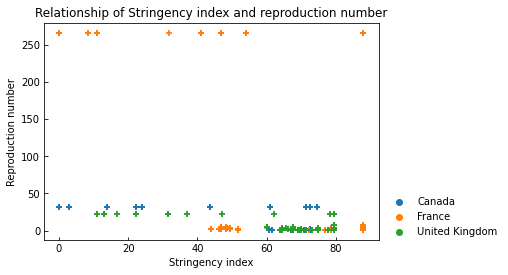

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()